# Interpretation of SHAP charts for the Titanic case (Feature Selection Techniques)

https://github.com/slundberg/shap

https://slundberg.github.io/shap/notebooks/NHANES%20I%20Survival%20Model.html

In [1]:
import pandas as pd

df = pd.read_csv('/home/wojciech/Pulpit/1/tit_train.csv', na_values="-1")
df.head(2)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


## Using loops in place of gaps I insert values out of range

In [2]:
## ile jest zmiennych
a,b = df.shape     #<- ile mamy kolumn
b

13

In [3]:
print('NUMBER OF EMPTY RECORDS vs. FULL RECORDS')
print('----------------------------------------')
for i in range(1,b):
    i = df.columns[i]
    r = df[i].isnull().sum()
    h = df[i].count()
   
    if r > 0:
        print(i,"--------",r,"--------",h) 

NUMBER OF EMPTY RECORDS vs. FULL RECORDS
----------------------------------------
Age -------- 177 -------- 714
Cabin -------- 687 -------- 204
Embarked -------- 2 -------- 889


In [4]:
del df['Cabin']
df = df.dropna(how='any')

In [5]:
df = df.dropna(how='any')
df.isnull().sum()

Unnamed: 0     0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [6]:
df.shape

(712, 12)

### Encodes discrete (categorical) variables

In [7]:
import numpy as np

a,b = df.shape     #<- ile mamy kolumn
b


print('DISCRETE FUNCTIONS CODED')
print('------------------------')
for i in range(1,b):
    i = df.columns[i]
    f = df[i].dtypes
    if f == np.object:
        print(i,"---",f)   
    
        if f == np.object:
        
            df[i] = pd.Categorical(df[i]).codes
        
            continue
    

DISCRETE FUNCTIONS CODED
------------------------
Name --- object
Sex --- object
Ticket --- object
Embarked --- object


## <span style="color:blue">I run the LinearRegression () model

In [8]:
y = df['Survived']
X = df.drop('Survived', axis=1)

In [9]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor()
model.fit(X, y) 

/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [10]:
#import xgboost
import shap
shap.initjs()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


# Interpretation of SHAP diagnostic charts

<span style="color:green"> Interpretacja wykresów diagnostycznych SHAP

### Graph (1) of overall function suitability assessment
<span style="color:green">  Wykres (1) ogólnej oceny przydatności funkcji

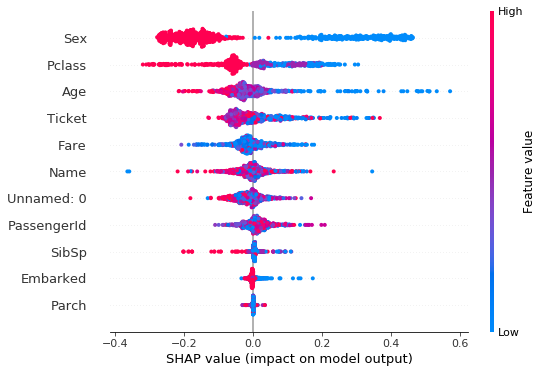

In [11]:
shap.summary_plot (shap_values, X)

Chart interpretation:
    • The x axis represents the SHAP value (which for this model is in logarithmic chances of winning). By   analyzing the validity for all functions, we can see which features greatly affect the model's predictive ability (e.g. 'Sex' and 'Pclass'), and which only slightly influence predictability (e.g. Parch, Embarked). Note that when the points do not form a horizontal line, they stack up vertically to show density.
    • Each dot is colored with a high red to blue low effect value. Each point is a Titanic man. one sex affected the model's assurance of prognosis, while the other significantly reduced the forecasting abilities of the model.
    • So it would be enough to somehow pull a woman and class 1 and the rest of the passengers. The other functions are only mixed up. This function counts where the blue and red enclaves are clean ('Sex' and 'Pclass').
1. The most important function in the model is 'Sex', slightly less important is 'Pclass', i.e. in which class the passenger traveled.
2. The importance of the feature on the ability to forecast: blue is low ability to forecast - red is the high ability of the model to forecast.
3. In the case of 'Sex' and 'Pclass' there are great differences between the sexes and between the classes in which travelers traveled.
4. 'Name', 'PassangerId', 'Ticket' you can see that there is no separation here and there is full randomness, the data is centered around 0 on the SHAP value axis.





<span style="color:green"> Interpretacja wykresu: 
    
<span style="color:green"> - Oś x przedstawia wartość SHAP (która dla tego modelu jest w jednostkach logarytmicznych szans na wygraną). Robiąc analizę ważności dla wszystkich funkcji, widzimy, które cechy bardzo wpływają na zdolności przewidywania modelu (np. 'Sex' i 'Pclass' ), a które tylko nieznacznie wpływają na przewidywanie (np. Parch, Embarked). Zauważ, że gdy punkty nie tworzą linii poziomej, układają się w pionowe stosy, aby pokazać gęstość. 
    
<span style="color:green">  - Każda kropka jest zabarwiona wartością wpływu tej cechy od wysokiej czerwonej do niebieskiej niskiej. Każdy punkt to człowiek z Titanica. jedna płeć wpływała na upewnienie się modelu co do prognozy a druga płeć istotnie obniżała zdolności prognostyczne modelu.
    
<span style="color:green">  - Czyli wystarczyłoby jakoś wyciągnąć kobieta i klasa 1 i reszta pasażerów. Pozostałe funkcje tylko mieszają. Ta funkcja się liczy gdzie są czyste enklawy niebieskie i czerwone ('Sex' i 'Pclass'). 

<span style="color:green">1. Najważniejszą funkcją w modelu jest 'Sex' nieco mniej ważną jest 'Pclass' czyli, w której klasie podróżował pasażer.

<span style="color:green">2. Ważność cechy na zdolność do prognozowania: niebieski to niska zdolność do prognozowania - czerwony to wysoka zdolność modelu do prognozowania

<span style="color:green">3. W przypadku 'Sex' i 'Pclass' istnieją wielkie różnice między płciami i miedzy klasami, w których podróżowali podróżni

<span style="color:green">4. 'Name', 'PassangerId', 'Ticket' widać, że tu nie ma rozdzielenia i jest pełna losowość, dane są skupione wokół 0 na osi SHAP value

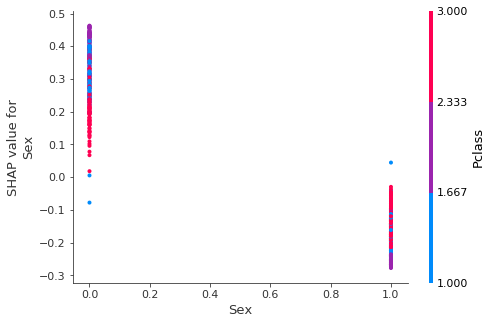

In [12]:
shap.dependence_plot("Sex", shap_values, X)

Chart interpretation: 

- This chart shows that women (marked as 0) differ in their impact on model estimation accuracy.
   Women are aptly typed by the model. Men are incorrectly selected.
   SHAP has yet automatically added the nearest relevant Pclass function. 
  
- The model most accurately estimates women from class 2, and the least from the set of women, those women who traveled in third class. In general, the values of women on the y-axis above zero mean that the model well predicted the fate of women and weaker the fate of men.

- Men from class 3 (red) were tipped quite aptly (certain that they would die). The model had a problem with men in classes 2 and 3 (had difficulty predicting or dying).


<span style="color:green"> Interpretacja wykresu: 
    
<span style="color:green"> - Na tym wykresie widać, że kobiety (oznaczone jako 0) różnią się wpływem na trafność szacowania modelu.
  Kobiety są trafnie typowane przez model. Mężczyźni są typowani nietrafnie.
  SHAP jeszcze dodał automatycznie najbliższą istotną funkcję Pclass. 
  
  
<span style="color:green"> - Najtrafniej model szacuje kobiety z klasy 2, a najmniej ze zbioru kobiet, te kobiety, które podróżowały klasą trzecią.
  Ogólnie wartości kobiet na osi y powyżej zera oznaczają, że model dobrze przewidywał los kobiet a słabiej los mężczyzn.

<span style="color:green"> - Mężczyźnie z klasy 3 (kolor czerwony) byli typowani dość trafnie (pewne, że zginą). Model miał problem z mężczyznami z klasy 2 i 3 (miał trudność z przewidzeniem czy zginą).



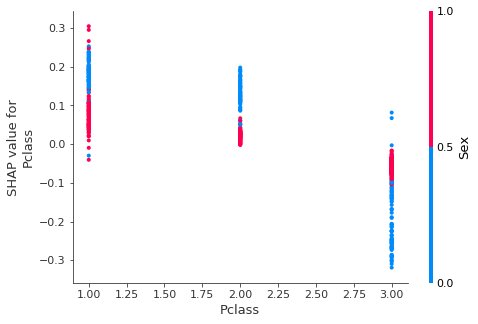

In [13]:
shap.dependence_plot("Pclass", shap_values, X)

The figure above shows
- class 1: half and half women = 0 (blue) and men = 1 (red). In the first class, the model coped well with forecasts, much better in class 1 forecasting what would happen to women than men.
- In class 3 the model had a very big problem with predicting what would happen to women, each blue point is one woman. As for the fate of men in class 3, the model predicted quite well - close to baseline.
- The conclusion is - if you throw women from class 3 from the data, the model would improve your ratings.


<span style="color:green">Na powyższym rysunku widać 

<span style="color:green">- klasę 1: pół na pół kobiety = 0 (niebieskie) i mężczyzn = 1 (czerwone). W klasie pierwszej model dobrze radził sobie z prognozami, znacznie lepiej w klasie 1 prognozował co stanie się z kobietami niż mężczyznami.

<span style="color:green">- W klasie 3 model miał bardzo duży problem z przewidzeniem co stanie się z kobietami, każdy niebieski punkt to jedna kobieta. Co do losu mężczyzn z klasy 3 model prognozował dość dobrze - blisko wartości bazowej.

<span style="color:green">- Nasuwa się wniosek - gdyby wyrzucić z danych kobiety z klasy 3 model poprawiłby swoje notowania.

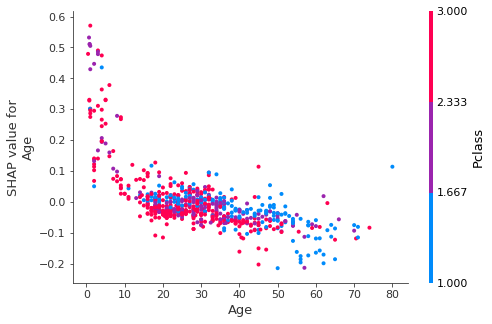

In [14]:
shap.dependence_plot("Age", shap_values, X)

Interpretation:
- The model coped well with predicting the fate of children, people from zero to 10 years old. Values above zero can be seen on the y axis.

- Above this age, the model could not very well indicate the fate of people. Forecasts are getting worse when people are older.
- spend on the cloud that the blue dots are above, which means that the model better predicted the fate of people from class 1 (blue dots) than from class three (red dots)



<span style="color:green">Interpretacja:

<span style="color:green">- Model doskonale radził sobie z przewidywaniem losu dzieci, osób w wieku od zera do 10 lat. Widać na osi y wartości powyżej zera.

<span style="color:green">- Powyżej tego wieku model nie umiał wskazywać bardzo dobrze na los osób. Prognozy pogarszają sie czym starsze są osoby.

<span style="color:green">- wydać na chmurze, że niebieskie kropkli są powyżej, co oznacza, że model lepiej przewidywał los ludzi z klasy 1 (niebieskie kropki) niż z klasy trzeciej (czerwone kropki) 

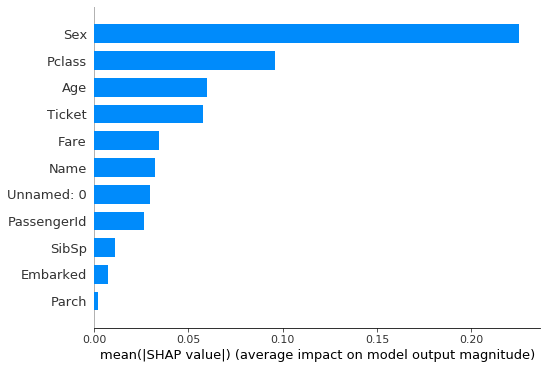

In [15]:
shap.summary_plot(shap_values, X, plot_type="bar")

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


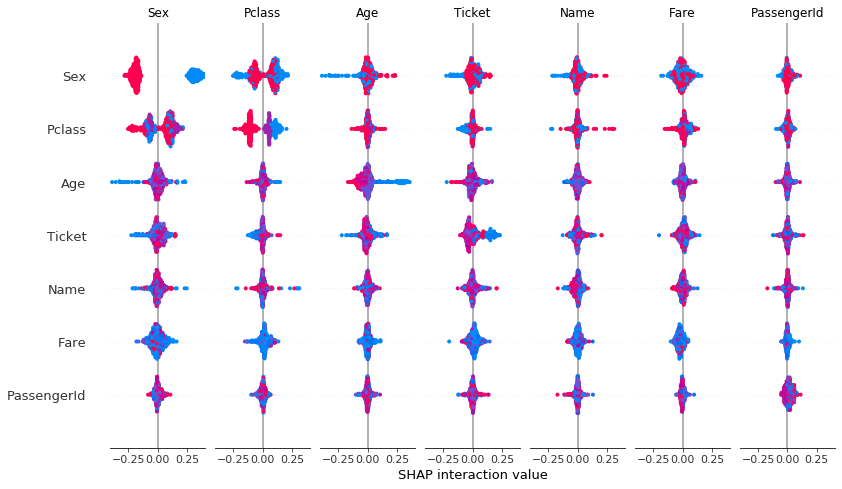

In [16]:
shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(X.iloc[:500,:])
shap.summary_plot(shap_interaction_values, X.iloc[:500,:])

Interpretation:

- statement: 'Sex' vs 'Pclass' shows that there are strong differences affecting the quality of forecasting.

- 'Age' vs 'Sex' has an illegible result

- the rest of the features are piled around zero and therefore have a low impact on improving or deteriorating forecasting quality.



<span style="color:green">Interpretacja:

<span style="color:green">- zestawienie: 'Sex' vs 'Pclass' pokazuje że istnieją mocne różnice wpływające na jakość prognozowania.

<span style="color:green">- 'Age' vs 'Sex' ma nieczytelny wynik

<span style="color:green">reszta cech jest zbita w stosy wokół zera i przez to mają niski wpływ na poprawę lub pogorszenie jakość prognozowania.